# Import libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  roc_auc_score , precision_score, recall_score , f1_score , accuracy_score , roc_curve , auc  


# Read and clean data

In [2]:
# Read from stroke Data set
strokeData = pd.read_csv('/Users/lenaalotaibi/Desktop/Bootcamp/MVP/healthcare-dataset-stroke-data.csv')

In [3]:
# provide the set of data 
strokeData.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Get information 
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# shows statistical population for each regression features
strokeData.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# get description about classification features
strokeData.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [7]:
# find duplicated data  
strokeData.duplicated().sum()

0

In [8]:
# find Null records  
strokeData.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# get median of feature has a null value 
Bmi_median=strokeData.bmi.median()
Bmi_median

28.1

In [10]:
# fill null records by median result 
strokeData.bmi.fillna(Bmi_median, inplace=True)

In [11]:
# provide the set of data after fill null records
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
# this function will give the age type
def get_age_type(age):
    if age <= 14:
        return 'Child'
    elif 15 <= age <=24:
        return 'Youth'
    elif 25<= age <= 64:
        return 'Adult'
    else:
        return 'Senior'

In [13]:
# apply get_age_type function 
strokeData.age.apply(get_age_type)

0       Senior
1        Adult
2       Senior
3        Adult
4       Senior
         ...  
5105    Senior
5106    Senior
5107     Adult
5108     Adult
5109     Adult
Name: age, Length: 5110, dtype: object

In [14]:
# Get information 
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
# add age type column using results of get_age_type function 
strokeData['Age_Type'] = strokeData.age.apply(get_age_type)


In [16]:
# provide the set of data after add new column
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Type
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Adult
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


# Correlation 

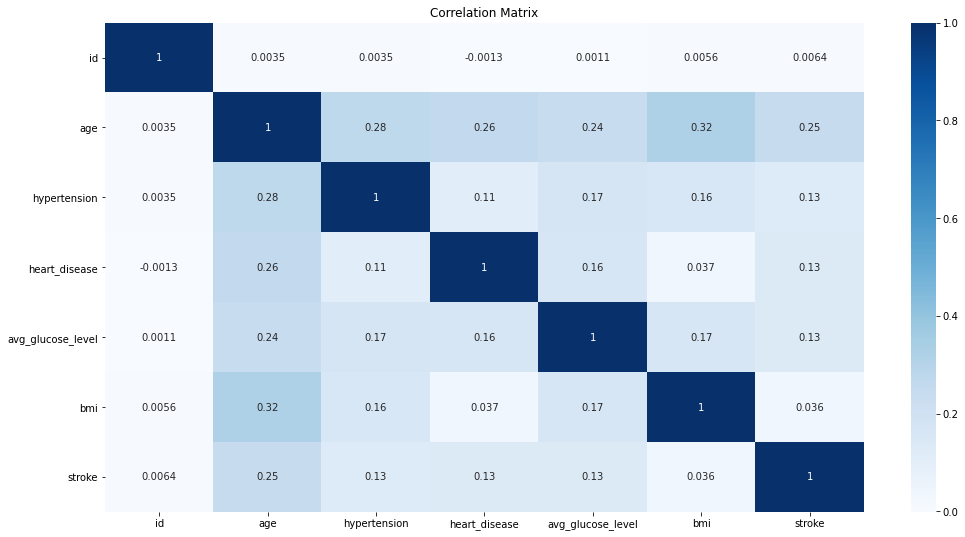

In [17]:
# provids Correlation between features and target(stroke)
ForCor= strokeData.loc[:,'gender':'stroke']
plt.figure(figsize=(17,9))
sns.heatmap(strokeData.corr(), annot = True , cmap= "Blues")
plt.title("Correlation Matrix")
plt.show()

# Data Analysis and Visualization

In [18]:
strokeData['stroke'].value_counts() #unbalnced data 

0    4861
1     249
Name: stroke, dtype: int64

In [19]:
# in order to classifi 0 to "No Stroke", and 1 to "Stroke"
stroke_dict = {
    1: 'Stroke',
    0: 'No stroke',
}

In [20]:
# add stroke_status column by map stroke_dict values
strokeData['stroke_status'] = strokeData.stroke.map(stroke_dict)


In [21]:
# provide the set of data after add new column
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Type,stroke_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,Stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Adult,Stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior,Stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult,Stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior,Stroke


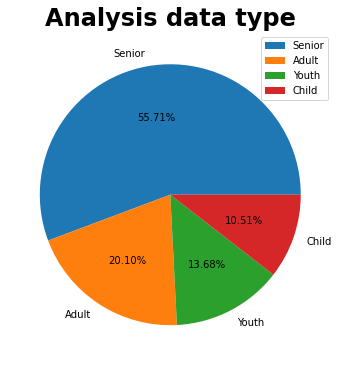

In [22]:
# find the most age type records in this data set 
sizes = strokeData['Age_Type'].value_counts()
plt.figure(figsize=(6,6),facecolor='white')

plt.pie(sizes, labels=['Senior','Adult', 'Youth ','Child'], autopct='%1.2f%%')
plt.title("Analysis data type", fontdict={'fontsize': 24,'weight':'bold'})
plt.legend()
plt.show()

In [23]:
# ceate mask for patient has a stroke
maskStroke= strokeData[(strokeData['stroke'] == 1)]
s= maskStroke.value_counts()
d=pd.DataFrame(s)
d

,,,,,,,,,,,,,,0
id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Type,stroke_status,
210,Male,81.0,0,0,Yes,Self-employed,Rural,91.54,31.4,never smoked,1,Senior,Stroke,1
52282,Male,57.0,0,0,Yes,Private,Rural,197.28,34.5,formerly smoked,1,Adult,Stroke,1
47269,Male,74.0,0,0,Yes,Private,Rural,219.72,33.7,formerly smoked,1,Senior,Stroke,1
47306,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1,Adult,Stroke,1
47472,Female,58.0,0,0,Yes,Private,Urban,107.26,38.6,formerly smoked,1,Adult,Stroke,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27458,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked,1,Adult,Stroke,1
28291,Female,79.0,0,1,Yes,Private,Urban,226.98,29.8,never smoked,1,Senior,Stroke,1
28378,Male,61.0,1,1,Yes,Private,Urban,112.24,37.4,smokes,1,Adult,Stroke,1


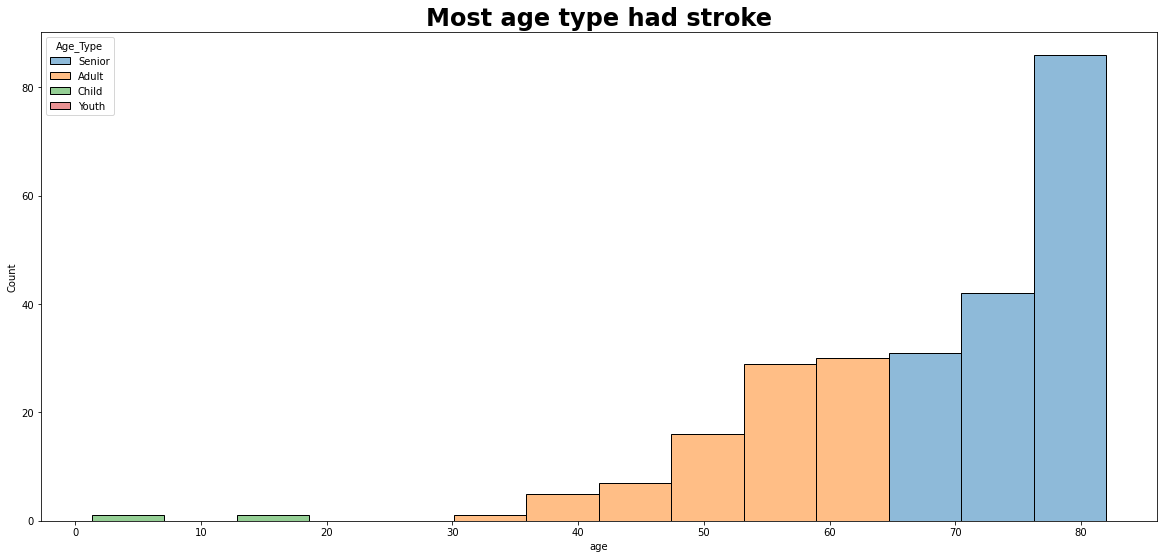

In [24]:
# find most age type has a stroke 
fig3, (ax1) = plt.subplots(1, figsize=(20, 9))
sns.histplot( x = maskStroke['age'], hue= strokeData['Age_Type'], ax=ax1)
plt.title('Most age type had stroke', fontdict={'fontsize': 24,'weight':'bold'})
plt.show()

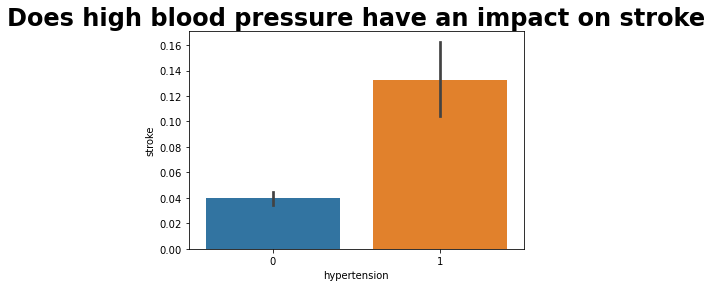

In [25]:
# find the impact of high blood pressure on stroke
sns.barplot(y='stroke',x='hypertension',data=strokeData)
plt.title('Does high blood pressure have an impact on stroke', fontdict={'fontsize': 24,'weight':'bold'})
plt.show()

## Build Models

In [26]:
# to encode the data records 
en=LabelEncoder()
EncData=strokeData.apply(en.fit_transform)

In [27]:
# shows data after encoded 
EncData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Type,stroke_status
0,671,1,88,0,1,1,2,1,3850,239,1,1,2,1
1,3610,0,82,0,0,1,3,0,3588,154,2,1,0,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1,0,1
4,114,0,100,1,0,1,3,0,3394,113,2,1,2,1


In [28]:
# create X "features" and Y "target: 
X=EncData.loc[:,'id':'smoking_status']
Y=EncData.stroke

In [29]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=24)

In [30]:
# find number of rows and features foe each variable
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088, 11)
(1022, 11)
(4088,)
(1022,)


In [31]:
# get the best model has a high ROC AUC Score and peformance
def bestModel(model):
        model.fit(X_train, y_train)
        y_pred =model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
        rocScore = roc_auc_score(y_test, y_prob)  
        acc=accuracy_score(y_test, y_pred)
        precision= precision_score(y_test, y_pred)
        recall= recall_score(y_test, y_pred)
        f1Score=f1_score(y_test, y_pred)
        
        
        print(model)
        print('')
        print('Precision: ', precision)
        print('')
        print('Recall:', recall )
        print('')
        print('F1 Score: ', f1Score)
        print('')
        print('Accuracy Score: ', acc)
        print('')
        print('ROC AUC Score:', rocScore )
        
        falsePositive, truePositive, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(falsePositive, truePositive)
        
        plt.plot(falsePositive, truePositive, color='blue', label= model)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.plot([0, 1], [0, 1], linestyle = '--' , color='r')
        plt.legend()
        plt.show()

LogisticRegression()

Precision:  0.0

Recall: 0.0

F1 Score:  0.0

Accuracy Score:  0.9481409001956947

ROC AUC Score: 0.6408230452674897


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


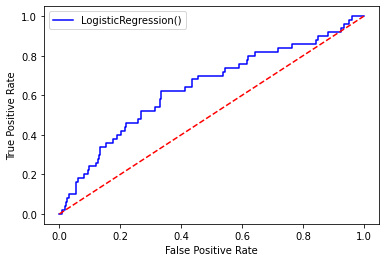

In [32]:
# create LogisticRegression Model 
lg= LogisticRegression() 
bestModel(lg)

KNeighborsClassifier()

Precision:  0.0

Recall: 0.0

F1 Score:  0.0

Accuracy Score:  0.9461839530332681

ROC AUC Score: 0.48768518518518517


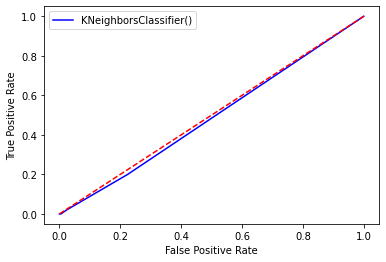

In [33]:
# create KNeighborsClassifier Model 
Kn=KNeighborsClassifier()
bestModel(Kn)